# Match Outcome Prediction using Betting Odds and Elo Ratings
This notebook trains a Random Forest classifier to predict football match outcomes using pre-match betting odds and Elo ratings.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the cleaned data
df = pd.read_csv("cleaned_data.csv")
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,HomeElo,AwayElo,ProbH,ProbD,ProbA,BookmakerMargin,EloDiff,ResultLabel
0,2001-01-01,Birmingham,Nottm Forest,0.0,2.0,A,1.75,3.25,3.90,1552.46,1504.57,0.571429,0.307692,0.256410,0.135531,47.89,-1
1,2001-01-01,Burnley,Wolves,1.0,2.0,A,1.80,3.15,3.90,1446.85,1487.49,0.555556,0.317460,0.256410,0.129426,-40.64,-1
2,2001-01-01,Norwich,Blackburn,1.0,1.0,D,2.80,2.90,2.35,1439.77,1567.17,0.357143,0.344828,0.425532,0.127502,-127.40,0
3,2001-01-01,Portsmouth,Gillingham,0.0,0.0,D,1.95,3.20,3.25,1445.81,1441.16,0.512821,0.312500,0.307692,0.133013,4.65,0
4,2001-01-01,Preston,Bolton,0.0,2.0,A,2.45,3.00,2.55,1461.54,1594.84,0.408163,0.333333,0.392157,0.133653,-133.30,-1


In [17]:
# Features and target
X = df[['ProbH', 'ProbD', 'ProbA', 'EloDiff', 'HomeElo', 'AwayElo']]
y = df['FTR']  # H: Home win, D: Draw, A: Away win

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.44425675675675674

Classification Report:
               precision    recall  f1-score   support

           A       0.41      0.45      0.43       169
           D       0.34      0.22      0.27       176
           H       0.51      0.60      0.55       247

    accuracy                           0.44       592
   macro avg       0.42      0.42      0.42       592
weighted avg       0.43      0.44      0.43       592


Confusion Matrix:
 [[ 76  29  64]
 [ 56  39  81]
 [ 52  47 148]]


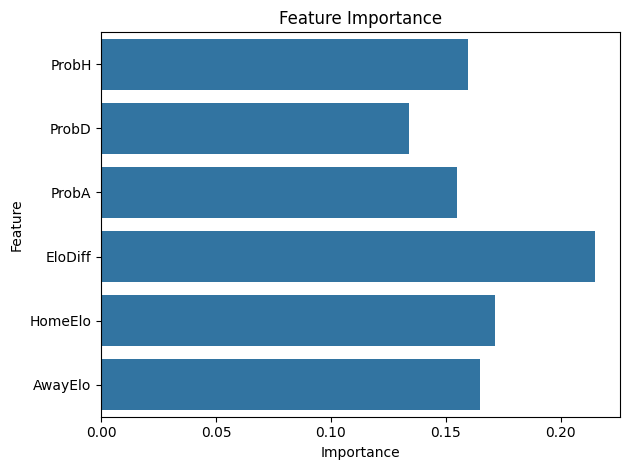

In [21]:
# Feature importance
feat_importances = model.feature_importances_
sns.barplot(x=feat_importances, y=['ProbH', 'ProbD', 'ProbA', 'EloDiff', 'HomeElo', 'AwayElo'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()